In [418]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [475]:
def log_scaling(t, A):
    return A*np.log(np.abs(t))

# Exponential decay function
def crit_decay(x, A, k):
    return A*np.abs(x)**(-k)

In [420]:
em = pd.read_csv("EM_N100.csv")
em= em[1:]

In [421]:
def get_reducedT(data, Tc = 2.269):
    t = (data["Temp"] - Tc)/Tc
    return t

In [422]:
t = get_reducedT(em)

In [423]:
tol = 0.05
t= t [(t < tol)]
t = t [(t > -tol)]

## C_v

In [424]:
def get_cv(data):

    cv = 1/data["Temp"] * data["E_std"]**2
    return cv

In [425]:
cv = get_cv(em) 


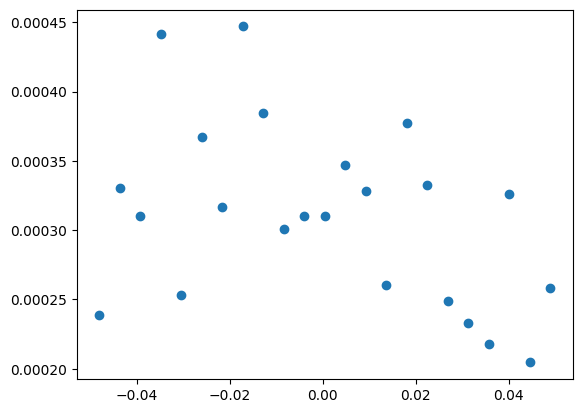

In [426]:
plt.scatter(t, cv[t.index])

In [427]:
popt, pcov = curve_fit(crit_decay, t, cv[t.index], p0=(1.0, 1))

In [428]:
popt

array([0.00027116, 0.03383651])

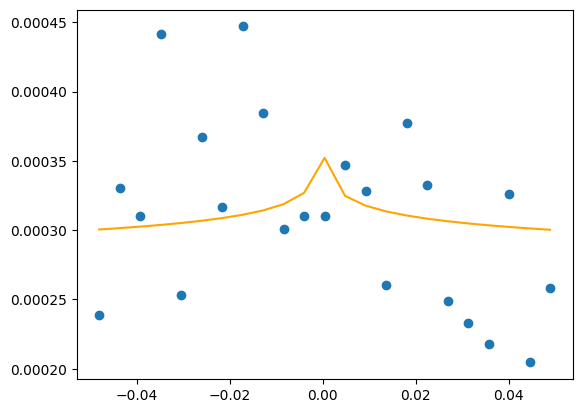

In [429]:
plt.scatter(t, cv[t.index])
plt.plot(t, crit_decay(t,*popt ), c= "orange")

In [430]:
alpha = popt[1]

In [431]:
pcov

array([[ 2.02513067e-09, -1.69769767e-06],
       [-1.69769767e-06,  1.53281207e-03]])

In [432]:
popt, pcov = curve_fit(log_scaling, t, cv[t.index], p0=(1.0))

In [433]:
popt

array([-7.33275832e-05])

In [434]:
alpha 

0.03383651431941017

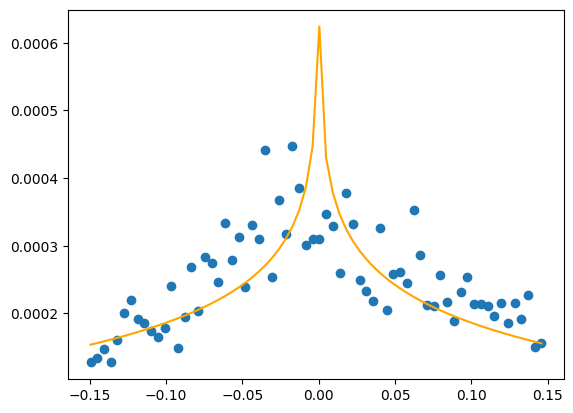

In [366]:
plt.scatter(t, cv[t.index])
plt.plot(t, log_scaling(t, *popt), color = "orange")

## M

In [435]:
t = get_reducedT(em)
tol = 0.05
t = t [(t < 0)]
t= t [(t > -tol)]


In [436]:
M = np.absolute(em["M_mean"])


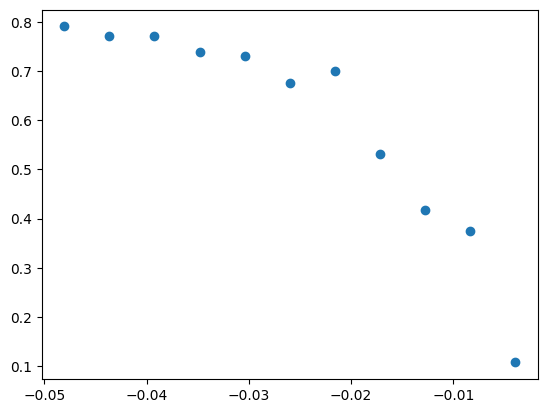

In [437]:
plt.scatter(t, M[t.index])

In [438]:
min_err = 1000
min_tol = 0
for tol in np.linspace(0.1, 1, 100):
    t = get_reducedT(em)
    t = t [(t < 0)]
    t= t [(t > -tol)]
    popt, pcov = curve_fit(crit_decay, np.abs(t), M[t.index], p0=(1.0, 1))
    error = (-popt[1] - 1/8)*8
    if np.abs(error) < min_err:
        min_err = np.abs(error)
        min_tol = tol

In [439]:
min_tol

0.6454545454545454

In [440]:
min_err

0.001658587819481916

In [441]:
popt, pcov = curve_fit(crit_decay, np.abs(t), M[t.index], p0=(1.0, 1))

In [442]:
popt

array([ 1.05018308, -0.0949053 ])

In [443]:
# expected 1/8

(-popt[1] - 1/8)*8

-0.2407576314697707

In [444]:
beta = -popt[1]

In [445]:
pcov

array([[ 3.31692699e-05, -1.90887375e-05],
       [-1.90887375e-05,  2.16564715e-05]])

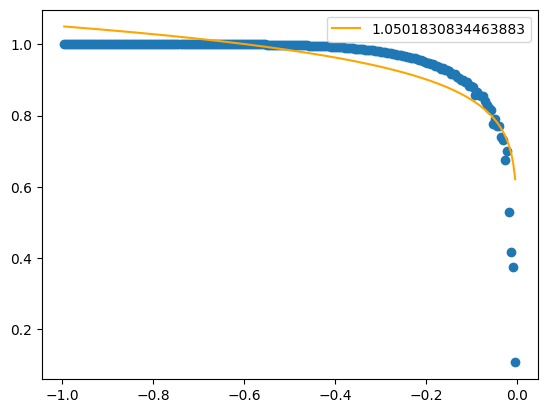

In [446]:
plt.scatter(t, M[t.index])
plt.plot(t, crit_decay(t, *popt), color = "orange", label = "{}".format(*popt))
plt.legend()

## Magneetic Susceptibility

In [480]:
t = get_reducedT(em)
tol = 0.08
t= t [(t < tol)]
t = t [(t > -tol)]

In [481]:
def get_ms(data):

    ms = data["M_std"]**2
    return ms

In [482]:
ms= get_ms(em)

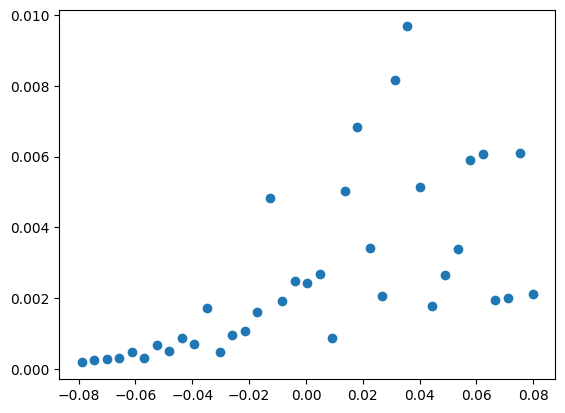

In [483]:
plt.scatter(t, ms[t.index])

In [484]:
t.index

Int64Index([209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
            222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
            235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245],
           dtype='int64')

In [486]:
min_err = 1000
min_tol = 0
for tol in np.linspace(0.05, 0.15, 100):
    t = get_reducedT(em)
    t = t [(t < tol)]
    t= t [(t > -tol)]
    popt, pcov = curve_fit(crit_decay, np.abs(t), ms[t.index], p0=(1.0, 1))
    error = (popt[1] - 7/4)/(7/4)
    if np.abs(error) < min_err:
        min_err = np.abs(error)
        min_tol = tol

In [487]:
min_err

0.9155924424287235

In [488]:
min_tol

0.15

In [489]:
popt, pcov = curve_fit(crit_decay, t, ms[t.index], p0=(1.0, 1))

In [490]:
popt

array([0.00135578, 0.14771323])

In [491]:
gamma = popt[1]

In [492]:
gamma

0.14771322574973375

In [493]:
(gamma - 7/4)/(7/4)

-0.9155924424287235

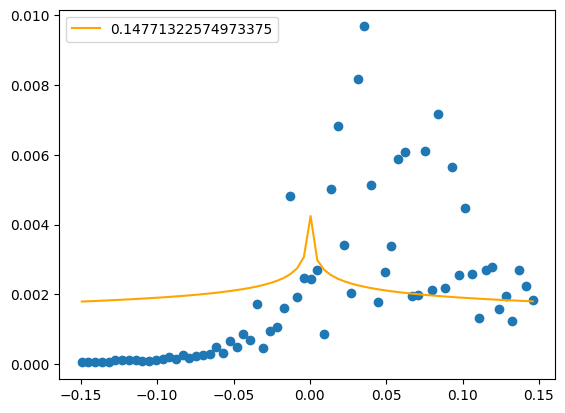

In [494]:
plt.scatter(t, ms[t.index])
plt.plot(t, crit_decay(t, *popt), color = "orange", label = "{}".format(popt[1]))
plt.legend()

### v

In [496]:
sc = pd.read_csv("SC_N100.csv", index_col = "Temp")
sc = sc.iloc[:, :-1]

In [497]:


# Exponential decay function
def exponential_decay(x, k):
    return np.exp(-x / k)

In [498]:
def cor_len(data):
    T =data.shape[0]
    Ks = []
    for i in range(T):
        
        popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )
        Ks.append(popt[0])
    return data.index, Ks


In [499]:
T, k= cor_len(sc)
Tc = 2.269
t = (T - Tc)/Tc

/var/folders/rz/8ns_4y5958ldxyg1ckf2wd0c0000gn/T/ipykernel_15116/2077461527.py:6: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exponential_decay, [i+1 for i in range(data.shape[1])], data.iloc[i], p0=(1), maxfev=2000 )


In [502]:
tol = 0.02
max_ind = list(t).index(t [(t < tol)][-1])
min_ind = list(t).index(t [(t > -tol)][0])

t= t[min_ind:max_ind]
k = k[min_ind:max_ind]

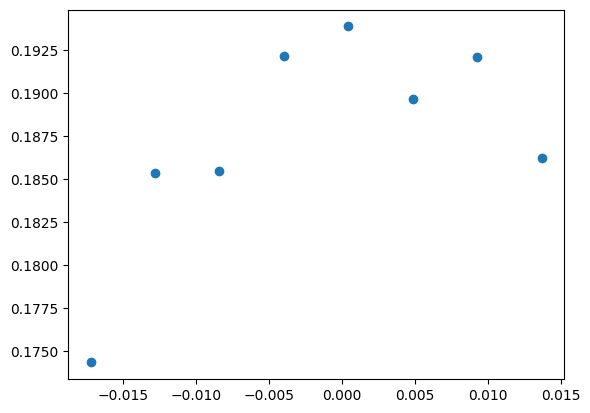

In [503]:
plt.scatter(t, k)

In [504]:
popt, pcov = curve_fit(crit_decay, t, k, p0=(1.0, 1))

In [505]:
v = popt[1]
v

0.018327157616079434

In [506]:
v-1

-0.9816728423839206

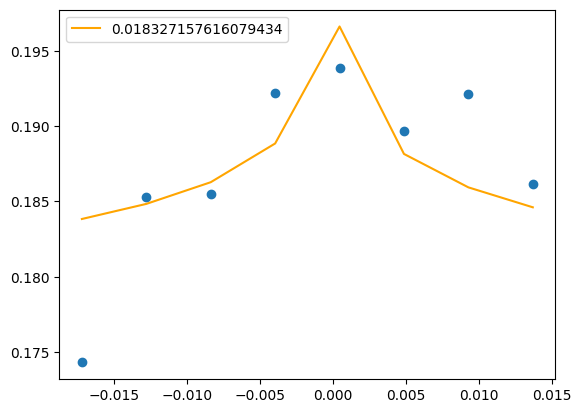

In [507]:
plt.scatter(t, k)
plt.plot(t, crit_decay(t, *popt), color = "orange", label = "{}".format(popt[1]))
plt.legend()

### n

In [508]:
def eta_func(t,n):
    return np.abs(t)**(-n)

In [509]:
sc

,d=1,d=2,d=3,d=4,d=5,d=6,d=7,d=8,d=9,d=10,...,d=40,d=41,d=42,d=43,d=44,d=45,d=46,d=47,d=48,d=49
Temp,,,,,,,,,,,,,,,,,,,,,
0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.95,0.001694,0.000239,-0.000004,0.000015,-0.000103,-0.000156,-0.000213,-0.000229,-0.000172,-0.000199,...,-0.000098,-0.000064,-0.000078,-0.000056,-0.000155,-0.000106,-0.000101,0.000022,-0.000045,-0.000147
4.96,0.001776,0.000361,0.000030,-0.000036,-0.000111,-0.000101,-0.000242,-0.000094,-0.000153,-0.000331,...,0.000152,-0.000109,-0.000234,-0.000171,-0.000223,-0.000275,-0.000191,-0.000340,-0.000326,-0.000067
4.97,0.001646,0.000145,-0.000160,-0.000107,-0.000140,-0.000193,-0.000094,-0.000278,-0.000170,-0.000188,...,0.000031,-0.000346,-0.000304,-0.000184,-0.000247,-0.000221,-0.000167,-0.000035,0.000022,-0.000048


In [510]:
T =sc.shape[0]
ns = []
for i in range(T):
    if sum(sc.iloc[i]) != 0:  
        popt, pcov = curve_fit(eta_func, [i+1 for i in range(sc.shape[1])],sc.iloc[i], p0=(1/4), maxfev=2000 )
        ns.append(popt[0])

In [511]:
n = np.mean(ns)
n

11.529575859668865

#### Rushbrooke

In [512]:
alpha + 2*beta+gamma

0.3713603322017013

#### Josephson


In [515]:
2 - alpha - 2*v

1.929509170448431

#### Fisher

In [516]:
gamma - (2 - n)*v 

0.3223632645442707

In [408]:
alpha

0.1287188585180189

In [409]:
beta

0.09490529606627866

In [410]:
gamma

0.351993648368668